In [24]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Embedding, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
import joblib
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR

In [3]:

X = pd.read_csv("rand_mdim_sample_100_X", index_col=False)
y = pd.read_csv("rand_mdim_sample_100_y", index_col=False)

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

pd.DataFrame(X_test).to_csv("rand_mdim_sample_X_TEST", index=False)
pd.DataFrame(y_test).to_csv("rand_mdim_sample_y_TEST", index=False)


In [7]:
with open("RNN_LSTM_1.json", "r") as json_file:
    rnn_json = json_file.read()

rnn = model_from_json(rnn_json)
rnn.load_weights("RNN_LSTM_1.weights.h5")

In [8]:
rnn_pred = rnn.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 495s 37s/step


In [10]:
rnn_err = root_mean_squared_error(rnn_pred, y_test)

In [25]:
svr = joblib.load('earthquake_model_4.pkl')
svr_pred = svr.predict(X_test)

In [26]:
svr_err = root_mean_squared_error(svr_pred, y_test)

In [29]:
svr_2 = SVR(kernel="rbf", epsilon=0.1, C=100)
svr_2.fit(X_train, y_train)

/Users/imac/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [30]:
svr_2_pred = svr_2.predict(X_test)

In [31]:
svr_2_err = root_mean_squared_error(svr_2_pred, y_test)

In [13]:
x_test_point = [i for i in range(0, len(X_test))]

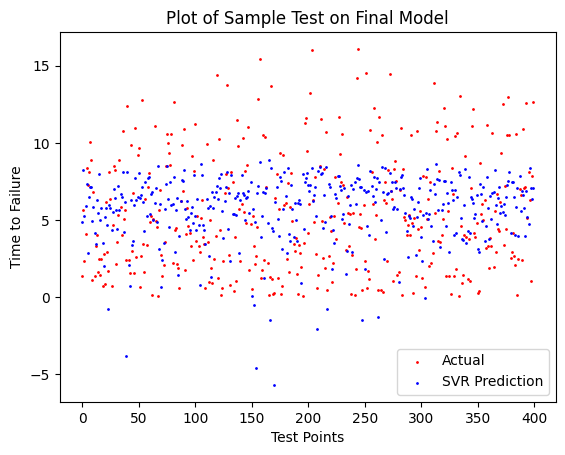

In [36]:
plt.title("Plot of Sample Test on Final Model")
plt.xlabel('Test Points')
plt.ylabel('Time to Failure')
plt.scatter(x_test_point, y_test, c="red", s=1, label="Actual")
#plt.scatter(x_test_point, rnn_pred, c="blue", s=1)
#plt.scatter(x_test_point, svr_pred, c="green", s=1)
plt.scatter(x_test_point, svr_2_pred, c="blue", s=1, label="SVR Prediction")
plt.legend()
plt.show()